In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [5]:
df = pd.read_csv(r'C:\Users\Élio Vieira\Desktop\IronHack\Classes\Unit 5 - EDA and Inferencial Stats\LABS\Lab_2 EDA Bivariate Analysis\amz_uk_price_prediction_dataset.csv')

In [6]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [18]:
#1.
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

sorted_crosstab = crosstab_result.sort_values(by=True, ascending=False)

sorted_crosstab

#prevalent best_seller, grocery

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306
...,...,...
Downhill Ski Boots,1284,0
Digital Frames,774,0
Motorbike Chassis,107,0


In [20]:
#2.
from scipy.stats import chi2_contingency

chi2, p, _, _ = chi2_contingency(crosstab_result)


In [23]:
chi2, p

(36540.20270061387, 0.0)

In [24]:
from scipy.stats.contingency import association

association(crosstab_result, method="cramer")

0.1222829439760564

<Axes: xlabel='category'>

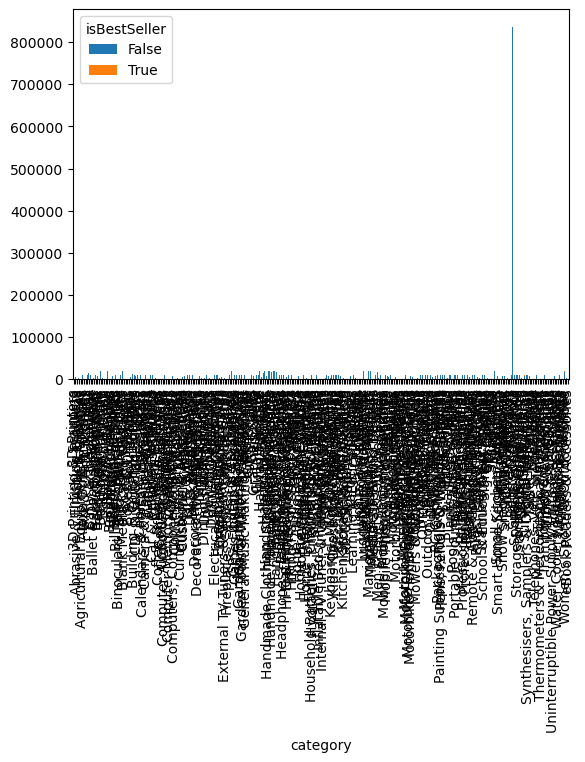

In [27]:
#3.
crosstab_result.plot(kind="bar", stacked=True)

In [32]:
#part 2
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

<Axes: xlabel='category', ylabel='price'>

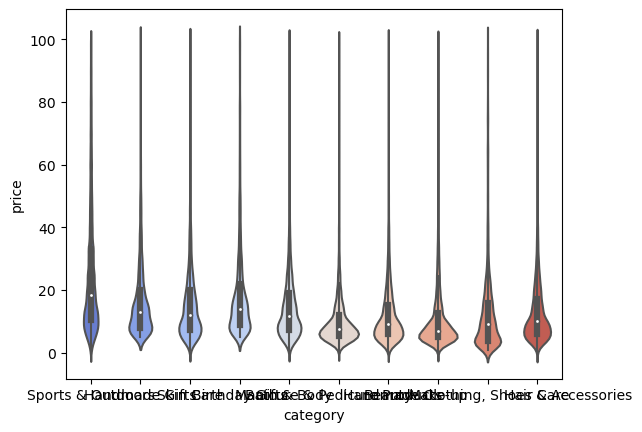

In [38]:
#1. 

top_categories = df_no_outliers['category'].value_counts().nlargest(10).index
df_top_categories = df_no_outliers[df_no_outliers['category'].isin(top_categories)]

sns.violinplot(data=df_top_categories, x='category', y='price', palette="coolwarm")


In [42]:
median_prices = df.groupby('category')['price'].median()

highest_median_category = median_prices.idxmax()
highest_median_price = median_prices.max()

display(highest_median_category)
display(highest_median_price)

'Laptops'

1042.725

<Axes: ylabel='category'>

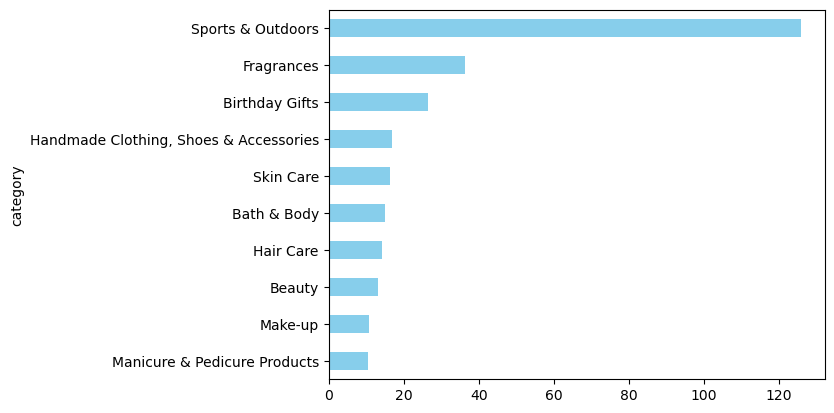

In [47]:
#2.
average_prices = df.groupby('category')['price'].mean()

top_categories = df['category'].value_counts().nlargest(10).index

top_categories_average_prices = average_prices[top_categories]

top_categories_average_prices.sort_values().plot(kind='barh', color='skyblue')

In [49]:
average_prices = df.groupby('category')['price'].mean()

highest_average_category = average_prices.idxmax()
highest_average_price = average_prices.max()

print(highest_average_category)
print(highest_average_price)

Laptops
1087.987826986755


<Axes: xlabel='stars', ylabel='category'>

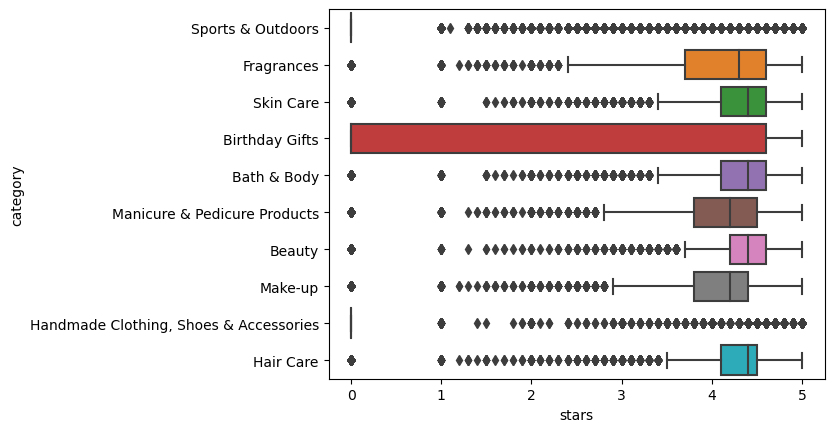

In [52]:
#3.
category_counts = df['category'].value_counts()

top_categories = category_counts.nlargest(10).index

df_top_categories = df[df['category'].isin(top_categories)]

sns.boxplot(data=df_top_categories, y='category', x='stars')

In [54]:
median_ratings = df.groupby('category')['stars'].median()

highest_median_rating_category = median_ratings.idxmax()
highest_median_rating = median_ratings.max()

print(highest_median_rating_category)
print(highest_median_rating)

Computer Memory
4.7


In [55]:
#part 3
#1.
correlation = df['price'].corr(df['stars'])
correlation

-0.12490673262148641

In [56]:
#No, there is no significant correlation between product price and its rating, 
#as the correlation coefficient is close to zero (approximately -0.125), indicating a weak correlation.

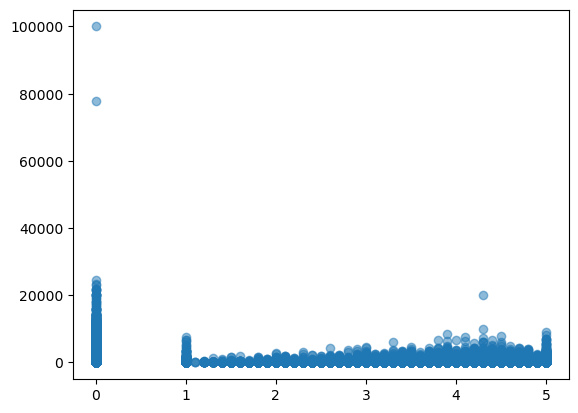

In [57]:
#2.
plt.scatter(df['stars'], df['price'], alpha=0.5)

In [ ]:
#the higher the price, the higher the rating

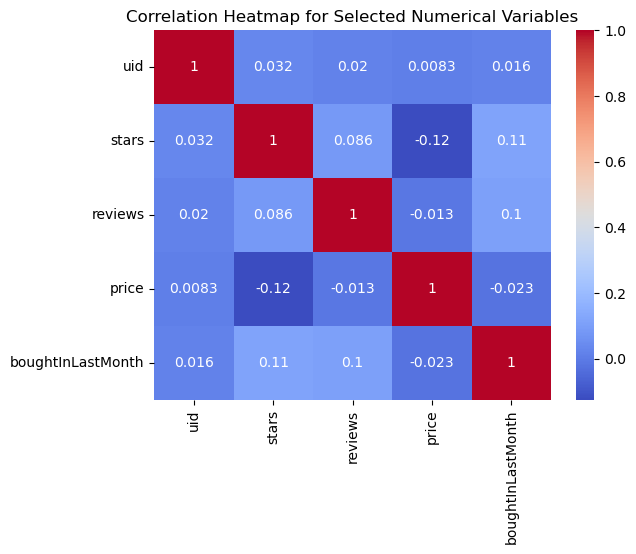

In [59]:
df_numerical = df.select_dtypes(include='number')

correlation_matrix = df_numerical.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

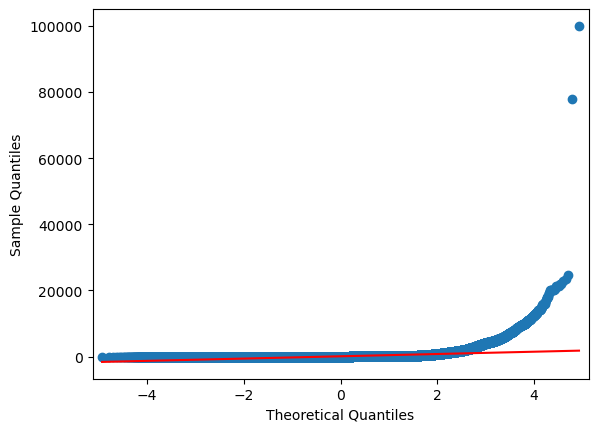

In [61]:
import statsmodels.api as sm

sm.qqplot(df['price'], line='s');